# Práctica 1 - Alberto Roig

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression


%matplotlib inline

In [211]:
# Lectura de los datos
data_train = pd.read_csv("dataset_coches_train.csv")
data_test = pd.read_csv("dataset_coches_test.csv")

In [212]:
# Eliminamos la columa que hace referencia al id dado que no contiene informacion relevante
data_train=data_train.drop(columns=['ID'])
data_test=data_test.drop(columns=['ID'])
display(data_train)
display(data_test)

,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,5.91,2.2,145.0,31995
1,vauxhall,GTC,2015,Manual,47870,Diesel,3.91,2.0,125.0,7700
2,audi,RS4,2019,Automatic,5151,Petrol,8.08,2.9,145.0,58990
3,vw,Scirocco,2016,Automatic,20423,Diesel,4.08,2.0,30.0,12999
4,skoda,Scala,2020,Semi-Auto,3569,Petrol,4.99,1.0,145.0,16990
...,...,...,...,...,...,...,...,...,...,...
4955,merc,GL Class,2015,Automatic,24314,Diesel,4.16,2.1,125.0,17999
4956,bmw,6 Series,2017,Automatic,18000,Diesel,4.58,3.0,145.0,28900
4957,vw,CC,2015,Manual,84932,Diesel,3.91,2.0,30.0,8998
4958,audi,A7,2017,Semi-Auto,30150,Diesel,3.75,3.0,145.0,23198


,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
0,merc,GLS Class,2017,Automatic,12046,Diesel,6.32,3.0,150.0,38000
1,vw,Amarok,2017,Automatic,37683,Diesel,6.50,3.0,260.0,23495
2,merc,GLS Class,2019,Automatic,10000,Diesel,6.92,3.0,145.0,59999
3,skoda,Scala,2019,Manual,3257,Petrol,4.74,1.0,145.0,16713
4,audi,RS6,2015,Semi-Auto,20982,Petrol,8.00,4.0,325.0,46000
...,...,...,...,...,...,...,...,...,...,...
2667,audi,A7,2015,Semi-Auto,21100,Petrol,7.92,4.0,325.0,28990
2668,merc,CLS Class,2015,Automatic,60972,Diesel,4.50,3.0,160.0,17450
2669,ford,Puma,2020,Manual,4111,Petrol,4.67,1.0,145.0,21995
2670,merc,CLA Class,2016,Automatic,25726,Petrol,5.67,2.0,200.0,18700


In [213]:
#Creacion del dato para predecir el resultado (ultimo apartado)
data_pred={'marca':['audi'],'modelo':[' A7'],'fecha':['2020'],'tipo_cambio':['Automatic'],'total_km':[5000],'tipo_combustible':['Hybrid'],'consumo':[5.50],'tipo_motor':[4.0],'tasa':[200.0]}
data_pred=pd.DataFrame(data_pred)
data_pred

,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa
0,audi,A7,2020,Automatic,5000,Hybrid,5.5,4.0,200.0


### Preprocesamiento de los datos

In [214]:
data_train.info() # Comprobacion de que no hay valores nulos para el train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             4960 non-null   object 
 1   modelo            4960 non-null   object 
 2   fecha             4960 non-null   int64  
 3   tipo_cambio       4960 non-null   object 
 4   total_km          4960 non-null   int64  
 5   tipo_combustible  4960 non-null   object 
 6   consumo           4960 non-null   float64
 7   tipo_motor        4960 non-null   float64
 8   tasa              4960 non-null   float64
 9   precio            4960 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 387.6+ KB


In [215]:
data_test.info() # Comprobacion de que no hay valores nulos para el test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             2672 non-null   object 
 1   modelo            2672 non-null   object 
 2   fecha             2672 non-null   int64  
 3   tipo_cambio       2672 non-null   object 
 4   total_km          2672 non-null   int64  
 5   tipo_combustible  2672 non-null   object 
 6   consumo           2672 non-null   float64
 7   tipo_motor        2672 non-null   float64
 8   tasa              2672 non-null   float64
 9   precio            2672 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 208.9+ KB


In [216]:
display(data_train.drop_duplicates().sum())
display(data_test.drop_duplicates().sum())
print('No se eliminan los duplicados dado que reducen la precisión del modelo')

marca               hyundivauxhallaudivwskodamerctoyotabmwtoyotafo...
modelo               Santa Fe GTC RS4 Scirocco Scala V Class Prius...
fecha                                                         9940458
tipo_cambio         Semi-AutoManualAutomaticAutomaticSemi-AutoAuto...
total_km                                                    123468208
tipo_combustible    DieselDieselPetrolDieselPetrolDieselHybridPetr...
consumo                                                       26495.1
tipo_motor                                                    10476.5
tasa                                                           749780
precio                                                      115718417
dtype: object

marca               mercvwmercskodaaudivauxhallmercmerctoyotavwvwv...
modelo               GLS Class Amarok GLS Class Scala RS6 Combo Li...
fecha                                                         5372529
tipo_cambio         AutomaticAutomaticAutomaticManualSemi-AutoSemi...
total_km                                                     65687617
tipo_combustible    DieselDieselDieselPetrolPetrolPetrolDieselDies...
consumo                                                       14483.1
tipo_motor                                                     5687.7
tasa                                                           408125
precio                                                       63316576
dtype: object

No se eliminan los duplicados dado que reducen la precisión del modelo


In [217]:
display('Data_train',data_train)
display('Data_test',data_test)

'Data_train'

,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,5.91,2.2,145.0,31995
1,vauxhall,GTC,2015,Manual,47870,Diesel,3.91,2.0,125.0,7700
2,audi,RS4,2019,Automatic,5151,Petrol,8.08,2.9,145.0,58990
3,vw,Scirocco,2016,Automatic,20423,Diesel,4.08,2.0,30.0,12999
4,skoda,Scala,2020,Semi-Auto,3569,Petrol,4.99,1.0,145.0,16990
...,...,...,...,...,...,...,...,...,...,...
4955,merc,GL Class,2015,Automatic,24314,Diesel,4.16,2.1,125.0,17999
4956,bmw,6 Series,2017,Automatic,18000,Diesel,4.58,3.0,145.0,28900
4957,vw,CC,2015,Manual,84932,Diesel,3.91,2.0,30.0,8998
4958,audi,A7,2017,Semi-Auto,30150,Diesel,3.75,3.0,145.0,23198


'Data_test'

,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
0,merc,GLS Class,2017,Automatic,12046,Diesel,6.32,3.0,150.0,38000
1,vw,Amarok,2017,Automatic,37683,Diesel,6.50,3.0,260.0,23495
2,merc,GLS Class,2019,Automatic,10000,Diesel,6.92,3.0,145.0,59999
3,skoda,Scala,2019,Manual,3257,Petrol,4.74,1.0,145.0,16713
4,audi,RS6,2015,Semi-Auto,20982,Petrol,8.00,4.0,325.0,46000
...,...,...,...,...,...,...,...,...,...,...
2667,audi,A7,2015,Semi-Auto,21100,Petrol,7.92,4.0,325.0,28990
2668,merc,CLS Class,2015,Automatic,60972,Diesel,4.50,3.0,160.0,17450
2669,ford,Puma,2020,Manual,4111,Petrol,4.67,1.0,145.0,21995
2670,merc,CLA Class,2016,Automatic,25726,Petrol,5.67,2.0,200.0,18700


## 1. Representar gráficamente la distribución de la variable precio en el conjunto de entrenamiento

In [218]:
#Funcion que indica que rows tiene un valor que es outlier
#para ello se realiza de la misma forma que lo reliza eel boxplot
#,es decir, con el rango intercuartilico.
def detectaroutliers(dataframe):
    #Creamos el describe para utilizar los datos de los cuartiles
    describee=dataframe.describe()
    #Primer cuartil
    cuartil1 = describee['25%']
    #Tercer cuartil
    cuartil3 = describee['75%']
    #calculamos el rango intercuartilico
    iqr = cuartil3 - cuartil1
    #miramos el rango intercuartilico por arriba y por abajo
    #devuelve bools
    outliers1=(dataframe < (cuartil1-1.5*iqr))|(dataframe > (cuartil3+1.5*iqr))
    #seleccionamos solo los que son outliers
    outliers1= outliers1[outliers1==True]
    #pasamos a dataframe para manejar mejor los datos y coger el index que contiene las rows que son outliers
    dataframeoutliers=outliers1.to_frame()
    #cogemos los valores del index
    array=dataframeoutliers.index.values
    #Seleccionamos los valores de las rows que pasamos
    array2=dataframe.loc[array].values
    #Seleccionamos los valores que son unicos, es decir, que solo se queda con el valor una vez a pesar de que otra
    #row tenga dicho valor
    array2=np.unique(array2)
    return array2

<AxesSubplot:ylabel='Frequency'>

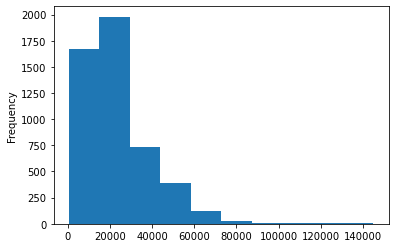

In [219]:
data_train['precio'].plot.hist()

Con este gráfico podemos ver la frecuencia con la que se dan ciertos precios, podemos ver que el rango de los 20000 a los 40000 es el más común, sin embargo, no ocurre los mismo con el resto de precios

count      4960.000000
mean      23469.943750
std       16406.714563
min         450.000000
25%       12000.000000
50%       18999.000000
75%       30335.750000
max      145000.000000
Name: precio, dtype: float64

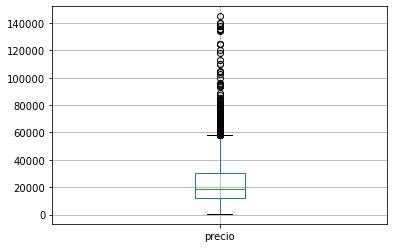

In [220]:
data_train.boxplot(column=['precio'])
data_train['precio'].describe()

In [221]:
descr=data_train.describe()
descr

,fecha,total_km,consumo,tipo_motor,tasa,precio
count,4960.000000,4960.000000,4960.00000,4960.000000,4960.000000,4960.000000
mean,2016.737903,24956.286895,5.37672,2.124375,152.332661,23469.943750
std,2.884035,24443.333662,3.14126,0.789368,82.403844,16406.714563
min,1997.000000,1.000000,0.50000,0.000000,0.000000,450.000000
25%,2016.000000,5641.250000,4.33000,1.600000,145.000000,12000.000000
50%,2017.000000,19000.000000,4.99000,2.000000,145.000000,18999.000000
75%,2019.000000,36702.000000,6.08000,2.800000,150.000000,30335.750000
max,2020.000000,259000.000000,84.01000,6.600000,580.000000,145000.000000


In [222]:
array2=detectaroutliers(data_train['precio'])
descr=data_train['precio'].describe()
#Explicacion
print('Con este gráfico podemos ver como se distribuye la variable precio en el conjunto de training podemos ver que la mayoria de los datos sobre la variable ' + 'precio' + ' se encuentran entre el numero '
          + str(descr['25%'])+ ' y el numero '+ str(descr['50%'])+' que corresponden al primer y al segundo cuartil respectivamente, podemos ver que el valor maximo es '
          +str(descr['max'])+' y que el valor minimo es '+str(descr['min'])+' los outliers en este caso son: '+str(array2)+'\n')

Con este gráfico podemos ver como se distribuye la variable precio en el conjunto de training podemos ver que la mayoria de los datos sobre la variable precio se encuentran entre el numero 12000.0 y el numero 18999.0 que corresponden al primer y al segundo cuartil respectivamente, podemos ver que el valor maximo es 145000.0 y que el valor minimo es 450.0 los outliers en este caso son: [ 57870  57890  57899  57970  57990  57991  57995  58000  58099  58332
  58450  58500  58700  58900  58940  58988  58990  58995  58999  59000
  59450  59900  59949  59950  59973  59988  59989  59990  59991  59995
  59999  60000  60399  60849  60970  60990  60995  60998  61700  61795
  61797  61854  61875  61898  61948  61990  61995  62850  62898  62980
  62990  62995  63000  63099  63806  63888  63950  63980  63990  63999
  64400  64652  64690  64789  64900  64950  64980  64990  64995  64999
  65000  65520  65990  66290  66540  66750  66988  66990  67000  67109
  67120  67480  67600  67699  67899  67940  

## 2. ¿Cuál es la marca más cara en promedio? ¿Y la más barata?

In [223]:
group=data_train.groupby(by=["marca"]).mean()['precio'].sort_values()
group

marca
vauxhall    11884.520147
skoda       13858.767059
hyundi      14619.753425
ford        15927.887728
toyota      18837.609865
vw          21792.028646
merc        30308.413924
bmw         37623.815047
audi        42330.967930
Name: precio, dtype: float64

In [224]:
group.idxmax() #Devuelve el valor que tiene más índice, en este caso, corresponde con la marca cuyo precio es mayor dado que se encuentra ordenado de manera ascendente

'audi'

Agrupamos los datos por la variable 'marca' y aplicamos la media, solo buscando el precio.
Ordenamos los valores en orden ascendente, por lo que, el maximo se encuentra en la fila más abajo (índice más alto ) y el más barato se encuentra en la primera fila (índice más bajo).

In [225]:
print('La marca mas barata promedio es: '+group.idxmin()+' y la marca más cara es: '+group.idxmax())

La marca mas barata promedio es: vauxhall y la marca más cara es: audi


## 3. Representar gráficamente la dependencia entre el precio y el kilometraje

In [226]:
data_train.corr()['precio'] #Dependencias de todas las variables con la variable 'precio'

fecha         0.501296
total_km     -0.478705
consumo       0.266942
tipo_motor    0.624899
tasa          0.144652
precio        1.000000
Name: precio, dtype: float64

In [227]:
data_train['precio'].corr(data_train['total_km']) #Dependencias entre la variable precio y kilometraje

-0.4787045824340315

In [228]:
print('La dependencia entre el precio y el kilometraje es de: '+ str(data_train.corr()['precio'].total_km))

La dependencia entre el precio y el kilometraje es de: -0.4787045824340292


Text(0.5, 1.0, 'Correlación entre el precio y el kilometraje')

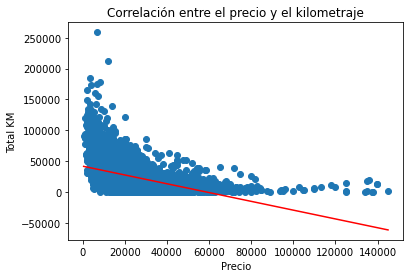

In [229]:
# plotting the data
plt.scatter(data_train['precio'], data_train['total_km'])
 
# This will fit the best line into the graph
plt.plot(np.unique(data_train['precio']), np.poly1d(np.polyfit(data_train['precio'], data_train['total_km'], 1))
         (np.unique(data_train['precio'])), color='red')
plt.xlabel('Precio')
plt.ylabel('Total KM')
plt.title('Correlación entre el precio y el kilometraje')

Podemos ver que se trata de una correlacion negativa del -0.4787045824340292

## 4. Calcular las variables más significativas, ya sea mediante un test estadístico o analizando el modelo entrenado.

Las varibles más significativas son aquellas que tienen un coeficiente de relación más cercano a 1 en valor absoluto con la variable precio.

In [230]:
corr=data_train.corr()['precio']
corr

fecha         0.501296
total_km     -0.478705
consumo       0.266942
tipo_motor    0.624899
tasa          0.144652
precio        1.000000
Name: precio, dtype: float64

In [231]:
var_sig=corr.loc[abs(corr)>0.4]
var_sig

fecha         0.501296
total_km     -0.478705
tipo_motor    0.624899
precio        1.000000
Name: precio, dtype: float64

No se eliminan las variables menos significativas dado que reducen la precisión del modelo, pero los pasos para su elimiación serían los siguientes:

data_train = pd.DataFrame(data_train, columns=var_sig.keys())
data_test = pd.DataFrame(data_test, columns=var_sig.keys())

In [232]:
#Paso variables categoricas a numéricas
label_encoder=preprocessing.LabelEncoder()
categorical_columns_train=data_train.select_dtypes(exclude=["int64","float64"]).columns
categorical_columns_test=data_test.select_dtypes(exclude=["int64","float64"]).columns
display(categorical_columns_train)
display(categorical_columns_test)

Index(['marca', 'modelo', 'tipo_cambio', 'tipo_combustible'], dtype='object')

Index(['marca', 'modelo', 'tipo_cambio', 'tipo_combustible'], dtype='object')

In [233]:
#Hacemos un fit del encoder con los datos de uno de los datasets y este se aplica en el training, en el test y en el dato para su predicción para que el enconder asigne los mismos valores
for i in categorical_columns_train:
    label_encoder.fit(data_train[i])
    data_train[i]=label_encoder.transform(data_train[i])
    data_test[i]=label_encoder.transform(data_test[i])
    data_pred[i]=label_encoder.transform(data_pred[i])

display(data_train.info())
display(data_test.info())
display(data_pred)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             4960 non-null   int64  
 1   modelo            4960 non-null   int64  
 2   fecha             4960 non-null   int64  
 3   tipo_cambio       4960 non-null   int64  
 4   total_km          4960 non-null   int64  
 5   tipo_combustible  4960 non-null   int64  
 6   consumo           4960 non-null   float64
 7   tipo_motor        4960 non-null   float64
 8   tasa              4960 non-null   float64
 9   precio            4960 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 387.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             2672 non-null   int64  
 1   modelo            2672 non-null   int64  
 2   fecha             2672 non-null   int64  
 3   tipo_cambio       2672 non-null   int64  
 4   total_km          2672 non-null   int64  
 5   tipo_combustible  2672 non-null   int64  
 6   consumo           2672 non-null   float64
 7   tipo_motor        2672 non-null   float64
 8   tasa              2672 non-null   float64
 9   precio            2672 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 208.9 KB


None

,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa
0,0,3,2020,0,5000,2,5.5,4.0,200.0


## Creacion de los datos de training y de test

In [234]:
#Como ya tenemos los datos separados en 2 datasets de training y de test no es necesario utilizar el 'train_test_split'
x_train=data_train.drop(["precio"],axis=1)
y_train=data_train["precio"]
x_test=data_test.drop(["precio"],axis=1)
y_test=data_test["precio"]


### Creacion del modelo

### Prueba con arbol de clasificación

In [235]:
#Vemos el numero maximo de profundidad del arbol para obtener el menor error, se utiliza este método y no el gridSearchCV dado que mediante este método se ha obtenido un modelo con menor error
def decissionTreeSearch(x_train,y_train,color):
    numero=list(range(1, 101))
    error = []
    error = list()
    for i in range (1,101):
        #Definimos el clasificador
        arbol=DecisionTreeClassifier(max_depth=i,random_state=5)
        #Entrenamos con el clasificador y los datos de entrenamiento
        arbol.fit(x_train,y_train)
        #Calculamos el error
        precision=arbol.score(x_test,y_test)
        errorpreci=1-precision
        #Guardamos el error en el array
        error.append(errorpreci)
        #Grafica que muestra la comparacion del error con la profundidad
    zmin = np.min(error)
    posicion=np.where(min(error) == error)
    posicion=np.asarray(posicion)
    print('El numero de max depth es: '+str(posicion+1))
    print("Minimo error es: "+str(zmin))
    plt.figure(figsize=(30,9))
    plt.plot(numero, error,color=color)
    plt.title('Error Max depth ')
    plt.xticks(numero)
    plt.xlabel('Max depth')
    plt.ylabel('Error')
    plt.show()
    return posicion+1

El numero de max depth es: [[28]]
Minimo error es: 0.969685628742515


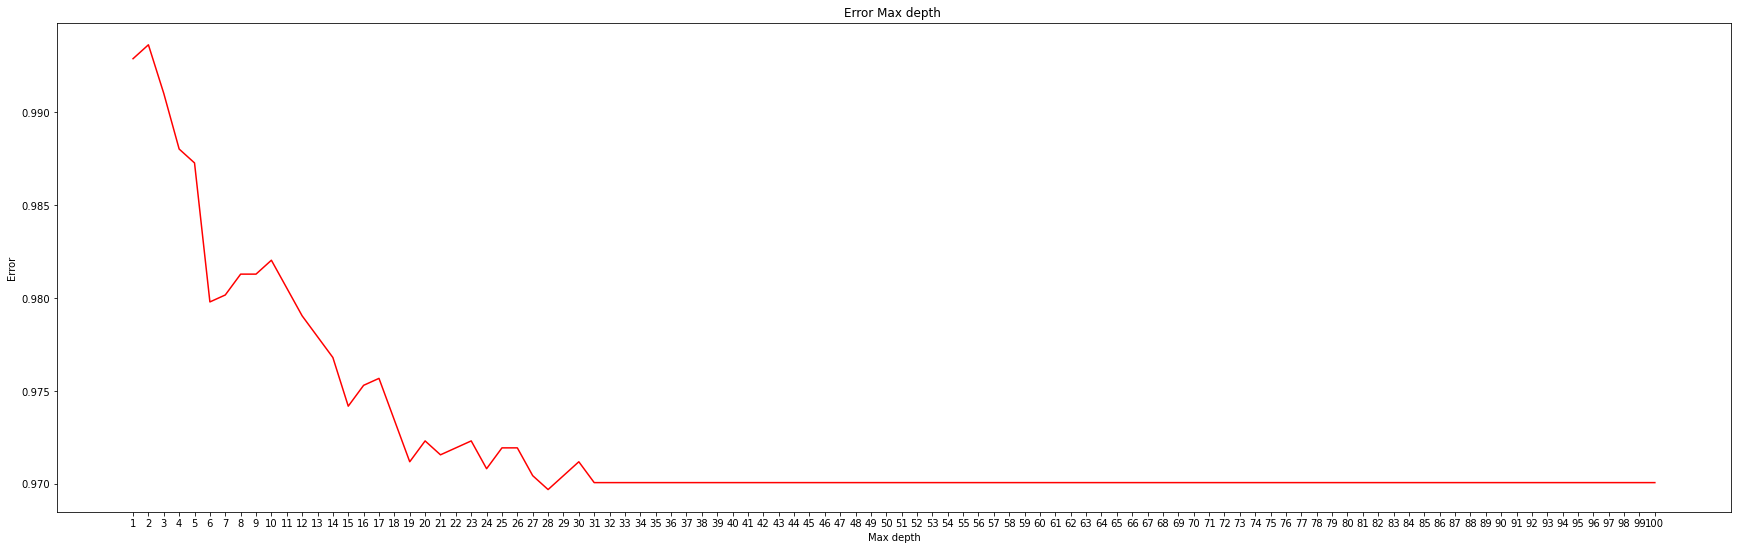

In [236]:
depth=decissionTreeSearch(x_train, y_train,'red')

In [237]:
print('Como se puede ver en la gráfica se obtiene el mínimo error en el arbol cuando este tiene como valor de maxdepth: ',depth)

Como se puede ver en la gráfica se obtiene el mínimo error en el arbol cuando este tiene como valor de maxdepth:  [[28]]


### Prueba con arbol de regresión

In [238]:
def regressorTreeSearch(x_train,y_train,color):
    numero=list(range(1, 101))
    error = []
    error = list()
    
    for i in range (1,101):
        #Definimos el clasificador
        arbol=DecisionTreeRegressor(max_depth=i,random_state=5)
        #Entrenamos con el clasificador y los datos de entrenamiento
        arbol.fit(x_train,y_train)
        #Calculamos el error
        precision=arbol.score(x_test,y_test)
        errorpreci=1-precision
        #Guardamos el error en el array
        error.append(errorpreci)
        #Grafica que muestra la comparacion del error con la profundidad
    zmin = np.min(error)
    posicion=np.where(min(error) == error)
    posicion=np.asarray(posicion)
    print('El numero de max depth es: '+str(posicion+1))
    print("Minimo error es: "+str(zmin))
    plt.figure(figsize=(30,9))
    plt.plot(numero, error,color=color)
    plt.title('Error Max depth ')
    plt.xticks(numero)
    plt.xlabel('Max depth')
    plt.ylabel('Error')
    plt.show()
    return posicion+1

Como se puede ver en la grafica el minimo error se obtiene con un depth de 36 y el minimo error seria en este caso de 0.9794161676646707

El numero de max depth es: [[19]]
Minimo error es: 0.06753865857042629


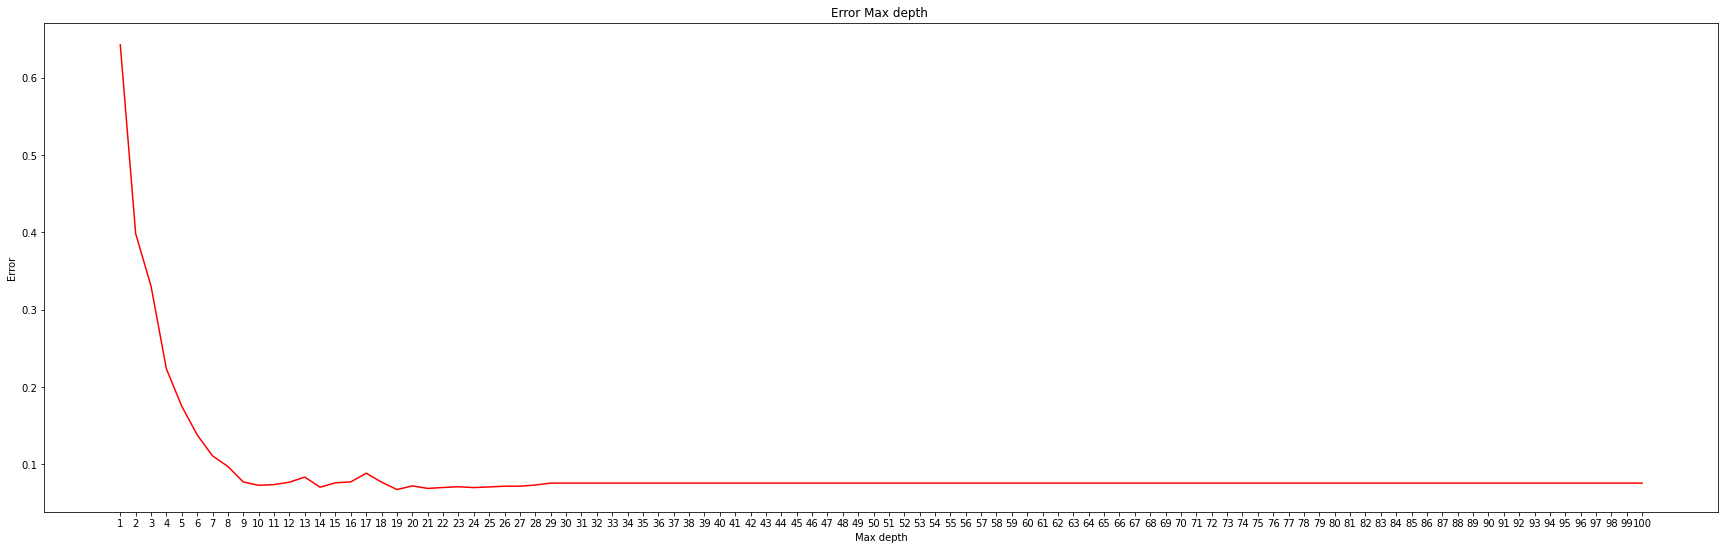

In [239]:
depth=regressorTreeSearch(x_train, y_train,'red')

In [240]:
print('Como se puede ver en la gráfica se obtiene el mínimo error en el arbol cuando este tiene como valor de maxdepth: ',depth)

Como se puede ver en la gráfica se obtiene el mínimo error en el arbol cuando este tiene como valor de maxdepth:  [[19]]


Tras comparar estos dos tipos de arboles se escogerá el tipo de arbol con menor error, que en este caso, es el arbor de regresión

### Creación del modelo con menor error para la predicción ( último apartado)

In [241]:
#Vemos el numero maximo de profundidad del arbol para obtener el menor error
#Creacion de las variables donde se guardan tanto el error como el numero de max depth
def regressorTreeSearchMSE(x_train,y_train,color,splitter):
    numero=list(range(1, 101))
    error = []
    error = list()
    
    for i in range (1,101):
        #Definimos el clasificador
        arbol=DecisionTreeRegressor(max_depth=i,random_state=5, splitter=splitter)
        #Entrenamos con el clasificador y los datos de entrenamiento
        arbol.fit(x_train,y_train)
        #Calculamos el error
        precision=arbol.score(x_test,y_test)
        errorpreci=1-precision
        #Guardamos el error en el array
        error.append(errorpreci)
        #Grafica que muestra la comparacion del error con la profundidad
    zmin = np.min(error)
    posicion=np.where(min(error) == error)
    posicion=np.asarray(posicion)
    print('El numero de max depth es: '+str(posicion+1))
    print("Minimo error es: "+str(zmin))
    plt.figure(figsize=(30,9))
    plt.plot(numero, error,color=color)
    plt.title('Error Max depth ')
    plt.xticks(numero)
    plt.xlabel('Max depth')
    plt.ylabel('Error')
    plt.show()
    return posicion+1

El numero de max depth es: [[19]]
Minimo error es: 0.06753865857042629


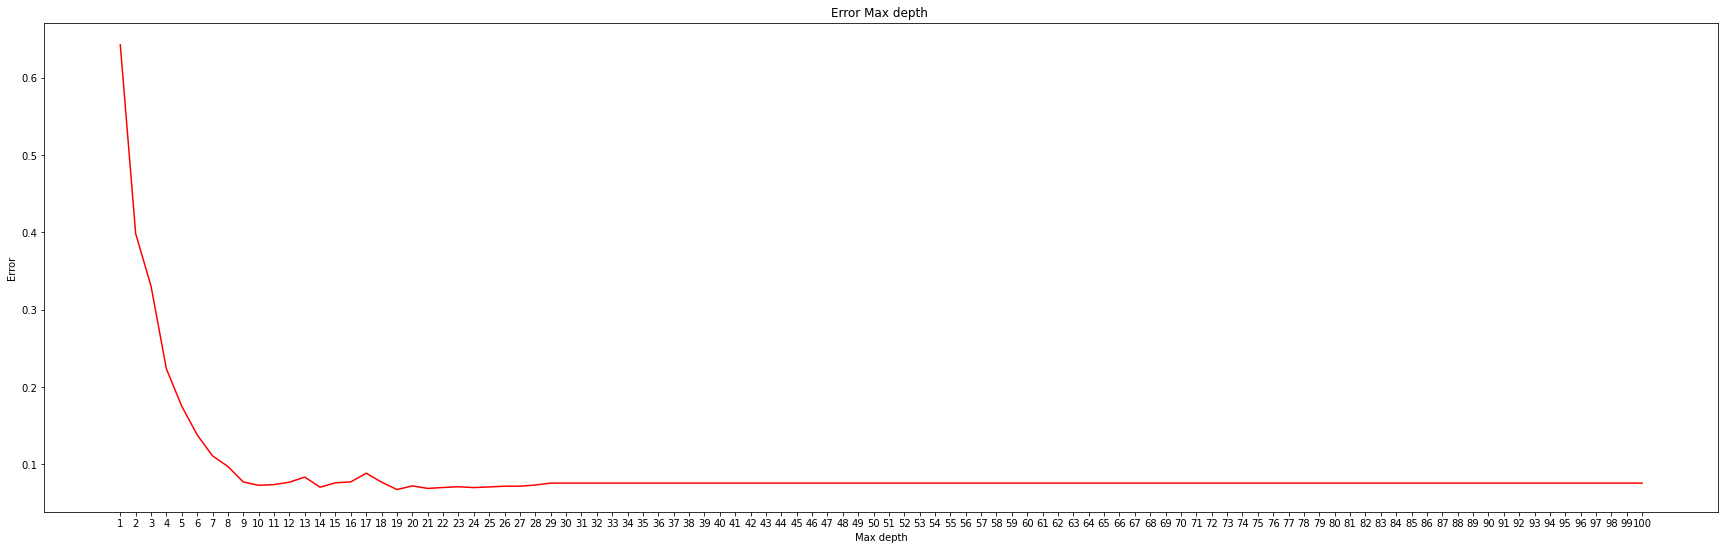

In [242]:
depthbest=regressorTreeSearchMSE(x_train, y_train,'red', 'best')


El numero de max depth es: [[17]]
Minimo error es: 0.06428651033661015


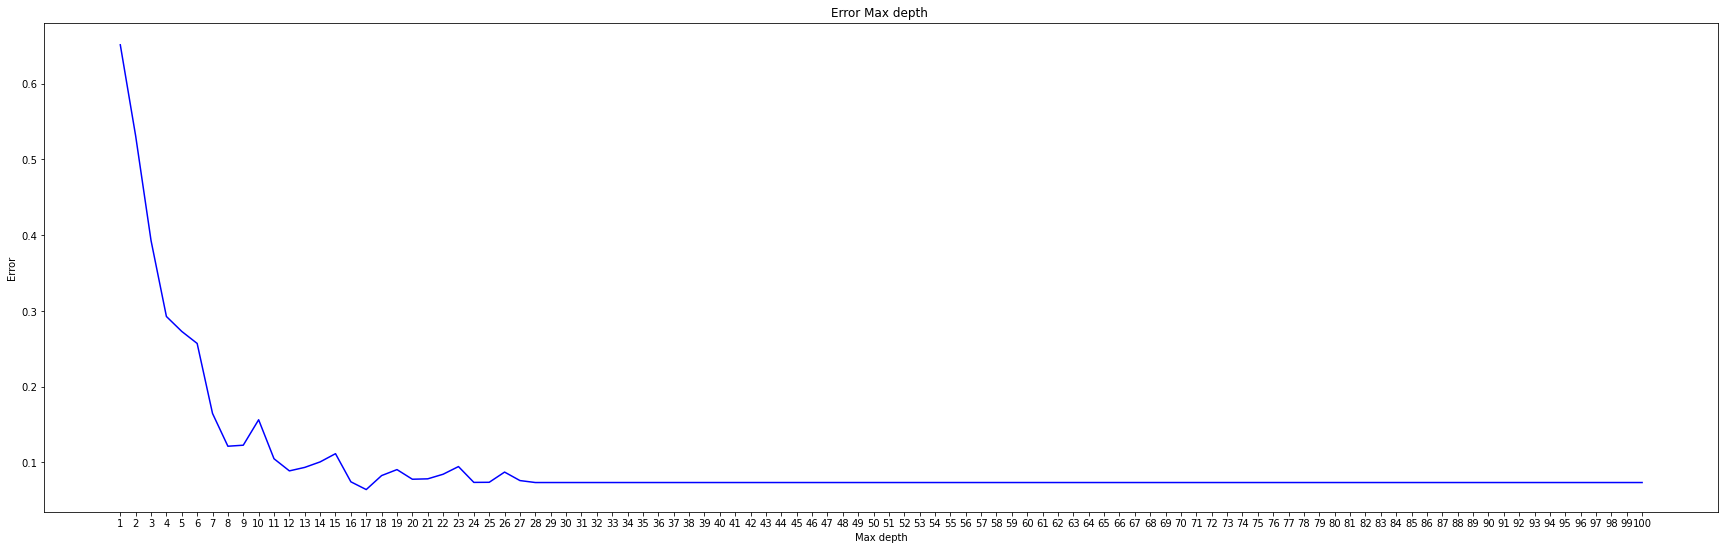

In [243]:
depthrandom=regressorTreeSearchMSE(x_train, y_train,'blue', 'random')

Como podemos ver obtenemos el menor error utilizando el splitter 'random'.

In [244]:
#Creación del modelo con menor error
arbol=DecisionTreeRegressor(random_state=5,max_depth=17, splitter='random')
        #Entrenamos con el clasificador y los datos de entrenamiento
arbol.fit(x_train,y_train)
print("El score de este modelo es:", arbol.score(x_test,y_test))

El score de este modelo es: 0.9357134896633899


In [245]:

# Grid search
from sklearn.model_selection import GridSearchCV

grid_parameters = {
    'criterion': ['mse', 'friedman_mse'],
    'max_depth': list(range(1, 101)),
    'splitter':['best', 'random']
    }

grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid = grid_parameters, cv = 3)

# Comenzamos el entrenamiento
grid.fit(x_train, y_train)

print(grid.best_params_)

print(grid.score(x_test,y_test))

print(grid.best_estimator_)

{'criterion': 'mse', 'max_depth': 20, 'splitter': 'random'}
0.9077899630902142
DecisionTreeRegressor(max_depth=20, random_state=42, splitter='random')


Como podemos ver se ha obtenido un modelo con una precisión superior a la que nos proporciona GridSearchCV

In [246]:
arbol=DecisionTreeRegressor(random_state=5,max_depth=17, criterion='mse', splitter='random')
        #Entrenamos con el clasificador y los datos de entrenamiento
arbol.fit(x_train,y_train)
print("El score es:", arbol.score(x_test,y_test))

El score es: 0.9357134896633899


Una vez creado el modelo con la mejor precisión existen técnicas que combinan diferentes modelos, este es el caso, de RandomForestRegressor

In [247]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Craeción del modelo con mayor precisión
arbol = DecisionTreeRegressor(random_state=5,max_depth=17, criterion='mse', splitter='random')

arbol.fit(x_train, y_train)
arbol.score(x_test,y_test)

print('R2 en test: %.3f' % arbol.score(x_test,y_test))

# Random forest con 10 estimadores
randomForest = RandomForestRegressor(n_estimators = 11, random_state = 5)

randomForest.fit(x_train, y_train)
randomForest.score(x_test,y_test)

print('Random forest')
print('R2 en test: %.3f' % randomForest.score(x_test,y_test))



R2 en test: 0.936
Random forest
R2 en test: 0.949


Como hemos podido ver mediante esta tecnica de combinacion de modelos se ha obtenido un resultado superior al que se tenía previamente.
Para intentar maximizar los resultados se variará el numero de estimadores del RandomForestRegressor, como se ha realizado previamente con el parametro maxdepth del arbol de regresión

In [248]:
def randomForestRegressor(x_train,y_train,color, criterion):
    #Creamos los datos con de entrenamiento y el test
    #80% para el training 20%para el test
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    numero=list(range(1, 101))
    error = []
    error = list()
    
    for i in range (1,101):
        #Definimos el clasificador
        arbol=RandomForestRegressor(n_estimators = i, random_state = 5,criterion=criterion)
        #Entrenamos con el clasificador y los datos de entrenamiento
        arbol.fit(x_train,y_train)
        #Calculamos el error
        precision=arbol.score(x_test,y_test)
        errorpreci=1-precision
        #Guardamos el error en el array
        error.append(errorpreci)
        #Grafica que muestra la comparacion del error con la profundidad
    zmin = np.min(error)
    posicion=np.where(min(error) == error)
    posicion=np.asarray(posicion)
    print('El numero de estimadores es: '+str(posicion+1))
    print("Minimo error es: "+str(zmin))
    plt.figure(figsize=(30,9))
    plt.plot(numero, error,color=color)
    plt.title('Error estimadores ')
    plt.xticks(numero)
    plt.xlabel('Estimadores')
    plt.ylabel('Error')
    plt.show()
    return posicion+1

El numero de estimadores es: [[41]]
Minimo error es: 0.04246533442710132


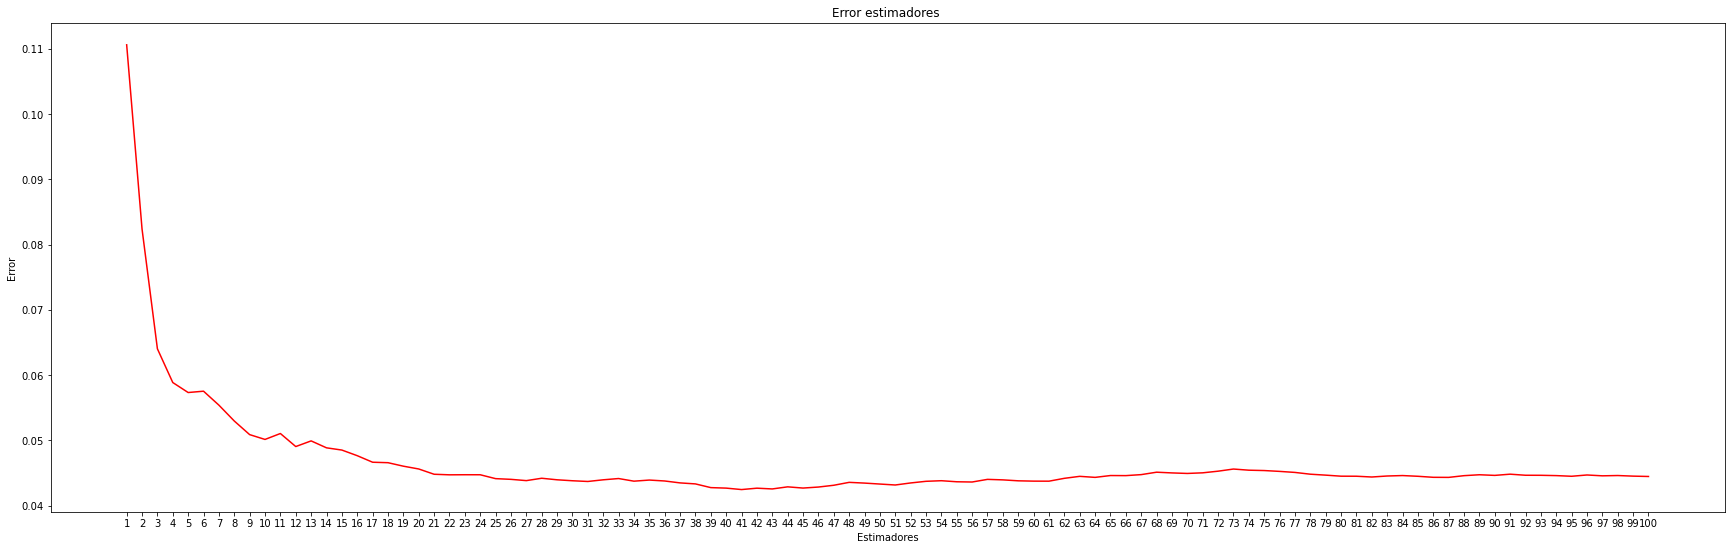

In [249]:
depth=randomForestRegressor(x_train, y_train,'red','mse')

El numero de estimadores es: [[41]]
Minimo error es: 0.04246533442710132


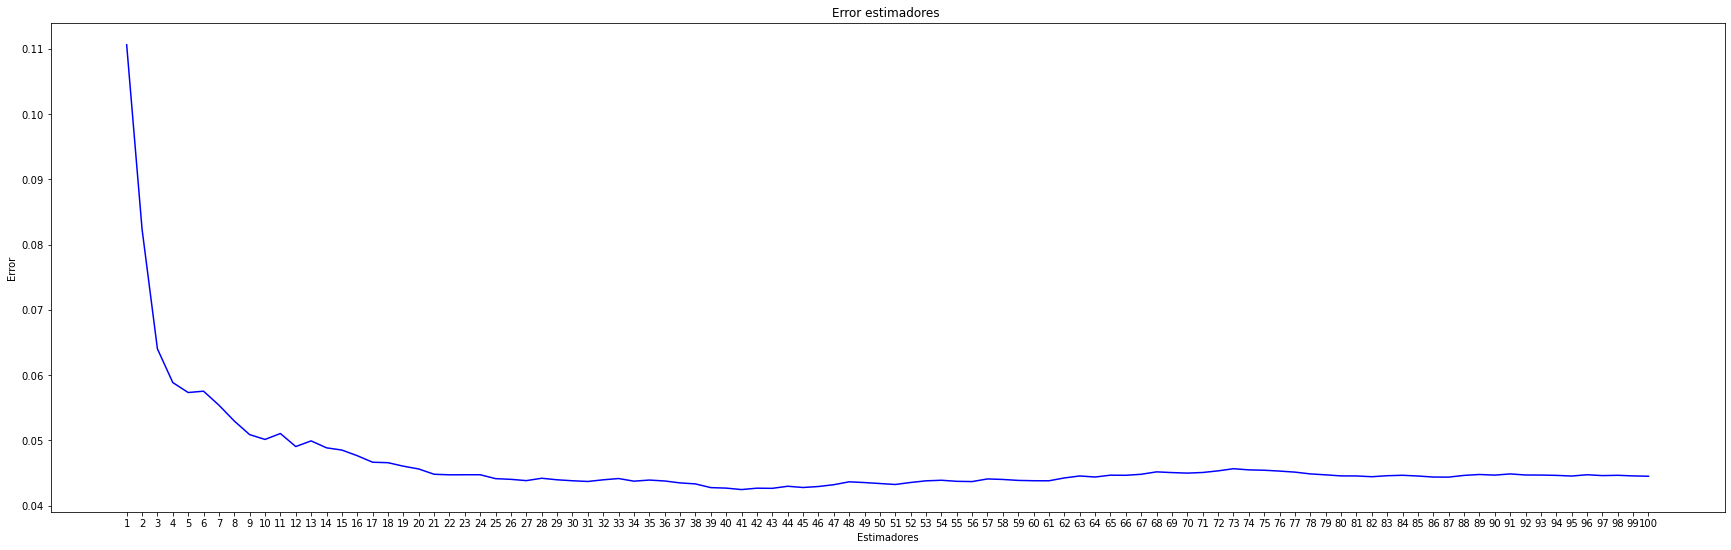

In [250]:
depth=randomForestRegressor(x_train, y_train,'blue','friedman_mse')

Como se puede ver en las gráficas el mejor modelo se consigue con un número de estimadores de 41 y el parámetro criterion es irrelevante, dado que se obtiene el mismo error en ambas gráficas.

In [251]:
#Creación del modelo con la precision más alta
arbol=RandomForestRegressor(n_estimators = depth[0][0], random_state = 5, criterion='friedman_mse')
arbol.fit(x_train, y_train)
arbol.score(x_test, y_test) 
print('Podemos ver que el modelo tiene un precisión de R2 de :', arbol.score(x_test, y_test))

Podemos ver que el modelo tiene un precisión de R2 de : 0.9575346655728987


Una vez que se obtiene el modelo optimizado se realiza el último apartado del ejercicio 1.

## 5. Un amigo quiere vender un audi A7 de 2020 con 5000 km, cambio automático,combustible híbrido, consumo de 5.5 l/100km y motor 4.0. La tasa de circulación es de 200€. ¿A cuánto debería venderlo?


Todas las transformaciones de este dato se ha realizado a lo largo del ejercicio.

In [252]:
print('El precio al que se deberia de vender el coche es: '+str(arbol.predict(data_pred)[0])+'€')

El precio al que se deberia de vender el coche es: 51119.34146341463€


In [253]:
arbol=DecisionTreeRegressor(random_state=5,max_depth=17, criterion='mse', splitter='random')
        #Entrenamos con el clasificador y los datos de entrenamiento
arbol.fit(x_train,y_train)
print("El score del arbol de regresión sin optimizar es:", arbol.score(x_test,y_test))

El score del arbol de regresión sin optimizar es: 0.9357134896633899


In [254]:
print('En el caso de querer utilizar el arbol sin técnicas de optimización el precio al que tendria que vender el coche , sería: '+str(arbol.predict(data_pred)[0])+'€')

En el caso de querer utilizar el arbol sin técnicas de optimización el precio al que tendria que vender el coche , sería: 65000.0€


Como podemos ver no hay mucha diferencia entre el precio que nos indican los dos modelos para la venta de los productos dado que no varía mucha la precisión entre ambos modelos.

# Referencias
* Apuntes de clase
* Ejercicios de clase
* Apuntes de la carrera
* Ejercicios de la carrera
* Librería de sklearn:
https://scikit-learn.org/stable/
* Librería de pandas:
https://pandas.pydata.org/docs/
* Librería de matplotlib:
https://matplotlib.org/stable/gallery/index.html